In [9]:
# from pandas import scatter_matrix
# from pandas.io.parsers import read_csv
# from rpy2.robjects import r, pandas2ri
# from sklearn import preprocessing, model_selection
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score
#
# from boruta import BorutaPy
# from pprint import pprint
# from matplotlib import interactive
#
#
# import matplotlib.pyplot as plt
# import rpy2.robjects as robjects
# # import pandas.rpy.common as com
from pprint import pprint

import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# import sklearn.cluster as cluster
# import time
#
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier

import copy
import os

from PythonCode.Chapter2.CreateDataset import CreateDataset
from PythonCode.util import util
from PythonCode.util.VisualizeDataset import VisualizeDataset
from scipy.stats.mstats import normaltest


In [27]:
result_dataset_path = './intermediate_datafiles/'

# data = pd.read_csv( result_dataset_path + 'mydata_result.csv')

data = pd.read_csv( result_dataset_path + 'chapter3_result_final.csv')

In [28]:
data.head()

,Unnamed: 0,acc_phone_x,acc_phone_y,acc_phone_z,acc_watch_x,acc_watch_y,acc_watch_z,gyr_phone_x,gyr_phone_y,gyr_phone_z,...,mag_watch_y,mag_watch_z,press_phone_pressure,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7
0,2016-02-08 18:28:25.656222,-0.090433,0.164264,9.631744,9.550840,0.197679,1.513430,-0.008810,0.018548,-0.001514,...,58.998207,-23.318370,1029.041,-0.138962,0.675065,-0.020069,-0.084507,0.244690,-0.080521,0.053488
1,2016-02-08 18:28:25.906222,-0.096204,0.168119,9.632371,9.551758,0.189616,1.514936,-0.008766,0.018608,-0.001691,...,58.959727,-23.886958,1029.132,-0.142551,0.679169,-0.022941,-0.084407,0.244760,-0.081978,0.055226
2,2016-02-08 18:28:26.156222,-0.091631,0.166526,9.636167,9.551339,0.194102,1.511228,-0.008963,0.018207,-0.002332,...,58.133900,-25.272319,1029.282,-0.148400,0.683118,-0.027784,-0.086871,0.244486,-0.083685,0.053735
3,2016-02-08 18:28:26.406222,-0.087132,0.167139,9.633979,9.550147,0.200357,1.504115,-0.008844,0.018436,-0.002050,...,58.255560,-24.346528,1029.369,-0.151896,0.684830,-0.028696,-0.087882,0.245119,-0.081571,0.052963
4,2016-02-08 18:28:26.656222,-0.093228,0.166913,9.628586,9.552066,0.200733,1.501253,-0.008886,0.018699,-0.002256,...,59.248007,-23.400963,1029.268,-0.148518,0.683540,-0.028142,-0.086783,0.246324,-0.079864,0.054782


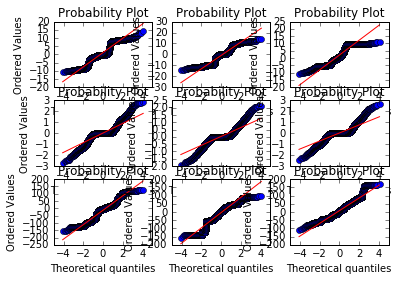

In [38]:
# 
# c = list(data)
# print c
# for cc in c:
#     normaltest(data[cc])
from scipy.stats import shapiro
import numpy as np 
import pylab 
import scipy.stats as stats

# normaltest(data['acc_phone_x'])
# shapiro(data['acc_phone_x'])

plt.subplot(3,3,1)
stats.probplot(data['acc_phone_x'], dist="norm", plot=pylab)
# pylab.show()

plt.subplot(3,3,2)
stats.probplot(data['acc_phone_y'], dist="norm", plot=pylab)
# pylab.show()

plt.subplot(3,3,3)
stats.probplot(data['acc_phone_z'], dist="norm", plot=pylab)
# pylab.show()

plt.subplot(3,3,4)
stats.probplot(data['gyr_phone_x'], dist="norm", plot=pylab)
# pylab.show()

plt.subplot(3,3,5)
stats.probplot(data['gyr_phone_y'], dist="norm", plot=pylab)
# pylab.show()

plt.subplot(3,3,6)
stats.probplot(data['gyr_phone_z'], dist="norm", plot=pylab)
# pylab.show()

plt.subplot(3,3,7)
stats.probplot(data['mag_phone_x'], dist="norm", plot=pylab)
# pylab.show()

plt.subplot(3,3,8)
stats.probplot(data['mag_phone_y'], dist="norm", plot=pylab)
# pylab.show()

plt.subplot(3,3,9)
stats.probplot(data['mag_phone_z'], dist="norm", plot=pylab)
pylab.show()



['', 'acc_phone_x', 'acc_phone_y', 'acc_phone_z', 'gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z', 'labelsitting', 'labeltable', 'labelstanding', 'labelwalking', 'mag_phone_x', 'mag_phone_y', 'mag_phone_z', 'press_phone_Pressure']


In [25]:
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute

# X is the complete data matrix
# X_incomplete has the same values as X except a subset have been replace with NaN

# Use 3 nearest rows which have a feature to fill in each row's missing features
X_filled_knn = KNN(k=3).complete(X_incomplete)

# matrix completion using convex optimization to find low-rank solution
# that still matches observed values. Slow!
X_filled_nnm = NuclearNormMinimization().complete(X_incomplete)

# Instead of solving the nuclear norm objective directly, instead
# induce sparsity using singular value thresholding
X_filled_softimpute = SoftImpute().complete(X_incomplete_normalized)

# print mean squared error for the three imputation methods above
nnm_mse = ((X_filled_nnm[missing_mask] - X[missing_mask]) ** 2).mean()
print("Nuclear norm minimization MSE: %f" % nnm_mse)

softImpute_mse = ((X_filled_softimpute[missing_mask] - X[missing_mask]) ** 2).mean()
print("SoftImpute MSE: %f" % softImpute_mse)

knn_mse = ((X_filled_knn[missing_mask] - X[missing_mask]) ** 2).mean()
print("knnImpute MSE: %f" % knn_mse)

result_dataset_path = '../intermediate_datafiles/'

data = pd.read_csv( result_dataset_path + 'chapter3_result_final.csv')

print(list(data))



ImportError: No module named fancyimpute